# Product Range Analysis Project

The objective of this project is to gain insights into the performance and composition of an online store's product range. By analyzing various aspects such as revenue, popularity, returns, and customer preferences, the project aims to provide valuable information for making data-driven decisions to optimize the product assortment and enhance overall business performance.

The store has been operating for a specific period, collecting data on customer purchases, product descriptions, revenue, and other relevant metrics. To better understand the dynamics of the product range, this analysis project was initiated. The analysis focuses on several key aspects of the product range, including revenue trends, seasonal patterns, category performance, popularity of specific products, and the relationship between unit prices and quantities purchased. By examining these factors, the project aims to provide actionable insights to optimize the product range, improve customer satisfaction, and drive business growth.

## Description of the data

The dataset utilized in this project consists of the transaction history of an online store specializing in household goods. The data spans from November 29, 2018, to December 7, 2019, covering a period of approximately one year.

The table `ecommerce_dataset_us.csv` contains the following columns:

- InvoiceNo — order identifier

- StockCode — item identifier

- Description — item name

- Quantity

- InvoiceDate — order date

- UnitPrice — price per item

- CustomerID

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
base_color=sns.color_palette()[0]
import matplotlib.pyplot as plt
%matplotlib inline
!pip install -U textblob
from textblob import TextBlob
!python -m textblob.download_corpora
import math as mth
from scipy import stats as st
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

     |████████████████████████████████| 636 kB 27.4 MB/s eta 0:00:01
[nltk_data] Downloading package brown to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


## Data Preprocessing

Preparing the data for further analysis:

In [2]:
product_range = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

In [3]:
product_range.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [4]:
product_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


Looks like we've got some missing values in a few columns. We also need to give the columns friendlier names that Python can handle, and tweak the data types of some columns.

In [5]:
product_range.columns = product_range.columns.str.lower()

In [6]:
product_range = product_range.rename(columns={"invoiceno": "invoice_no", "stockcode": "stock_code", 
                            "invoicedate": "invoice_date", "unitprice": "unit_price", 
                            "customerid": "customer_id"})

In [7]:
product_range['invoice_date'] = pd.to_datetime(product_range['invoice_date'])

In [8]:
product_range[product_range['description'].isna()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN


In [9]:
product_range[product_range['customer_id'].isna()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


In [10]:
product_range['customer_id'].isna().sum() / len(product_range) * 100

24.926694334288598

In [11]:
product_range['description'].isna().sum() / len(product_range) * 100

0.2683107311375157

The "customer_id" column is missing nearly 25% of its values, so we'll go ahead and fill those gaps with zeros in order to proceed with the data. However, since the "description" column has less than 1% of missing values, we can safely drop those rows.

In [12]:
product_range['customer_id'] = product_range['customer_id'].fillna(0)

In [13]:
product_range['description'] = product_range['description'].dropna()

In [14]:
product_range[product_range.duplicated()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0
...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446.0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446.0
541692,581538,22992,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
541699,581538,22694,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


In [15]:
product_range.duplicated().sum() / len(product_range) * 100

0.9721189350979592

Since the duplicated values make up approximately 1% of the data, we can safely remove them without significantly impacting the dataset. Hence, we will go ahead and drop the duplicated rows.

In [16]:
product_range = product_range.drop_duplicates()

In [17]:
product_range.describe(include='all', datetime_is_numeric=True)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
count,536641,536641,535187,536641.000000,536641,536641.000000,536641.000000
unique,25900,4070,4223,NaN,NaN,NaN,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN
freq,1114,2301,2357,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.620029,2019-07-02 08:57:06.087421696,4.632656,11435.904653
min,NaN,NaN,NaN,-80995.000000,2018-11-29 08:26:00,-11062.060000,0.000000
25%,NaN,NaN,NaN,1.000000,2019-03-26 10:52:00,1.250000,0.000000
50%,NaN,NaN,NaN,3.000000,2019-07-17 14:04:00,2.080000,14336.000000
75%,NaN,NaN,NaN,10.000000,2019-10-16 17:05:00,4.130000,16241.000000
max,NaN,NaN,NaN,80995.000000,2019-12-07 12:50:00,38970.000000,18287.000000


Given that the data collection period spans from November 29, 2018, to December 7, 2019, it is reasonable to anticipate peaks in purchases. This is due to the numerous holidays and shopping seasons that occur within this timeframe.

In [18]:
product_range['customer_id'] = product_range['customer_id'].astype('int')

In [19]:
product_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    536641 non-null  object        
 1   stock_code    536641 non-null  object        
 2   description   535187 non-null  object        
 3   quantity      536641 non-null  int64         
 4   invoice_date  536641 non-null  datetime64[ns]
 5   unit_price    536641 non-null  float64       
 6   customer_id   536641 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.8+ MB


In [20]:
product_range.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850


## Exploratory Data Analysis

### Enrich Data

In [21]:
product_range['year']  = product_range['invoice_date'].astype('datetime64[Y]')
product_range['month'] = product_range['invoice_date'].astype('datetime64[M]')
product_range['week']  = product_range['invoice_date'].astype('datetime64[W]') 
product_range['date'] = product_range['invoice_date'].dt.date

### Study core parameters

In [22]:
product_range[['invoice_no', 'description', 'quantity', 'unit_price']]

,invoice_no,description,quantity,unit_price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,536365,WHITE METAL LANTERN,6,3.39
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,0.85
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2.10
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,4.15
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15


In [23]:
product_range['quantity'].value_counts()

 1       144495
 2        81245
 12       60858
 6        40656
 4        38393
          ...  
-1681         1
-657          1
 199          1
-313          1
 512          1
Name: quantity, Length: 722, dtype: int64

In [24]:
product_range['unit_price'].value_counts()

1.25      49750
1.65      37627
0.85      28182
2.95      27350
0.42      24277
          ...  
323.98        1
183.00        1
511.25        1
290.59        1
221.16        1
Name: unit_price, Length: 1630, dtype: int64

In [25]:
checking = pd.pivot_table(product_range, index='description', values='stock_code', aggfunc='nunique').reset_index().sort_values(by= 'stock_code',ascending=False)
checking

,description,stock_code
4116,check,146
122,?,47
4126,damages,43
4124,damaged,43
4142,found,25
...,...,...
1450,GAOLERS KEYS DECORATIVE GARDEN,1
1451,GARAGE KEY FOB,1
1452,GARDEN METAL SIGN,1
1453,GARDEN PATH JOURNAL,1


It appears that certain entries labeled as "products" are actually administrative notes rather than actual products. To concentrate our analysis on the product range, we will exclude these administrative notes from our dataset.

In [26]:
notes = checking[checking['stock_code'] > 2]
notes

,description,stock_code
4116,check,146
122,?,47
4126,damages,43
4124,damaged,43
4142,found,25
4183,sold as set on dotcom,20
4106,adjustment,15
1123,Damaged,14
4195,thrown away,9
3740,"Unsaleable, destroyed.",9


In [27]:
# exclude the only description of a real product in this list
notes_to_delete = notes[notes['description'] != 'METAL SIGN,CUPCAKE SINGLE HOOK']['description']

In [28]:
notes_to_delete

4116                     check
122                          ?
4126                   damages
4124                   damaged
4142                     found
4183     sold as set on dotcom
4106                adjustment
1123                   Damaged
4195               thrown away
3740    Unsaleable, destroyed.
1447                     Found
283                     Amazon
124                         ??
4134                    dotcom
4145        had been put aside
4204               wet damaged
4139                      ebay
4109                    amazon
4132                  damages?
4179                   smashed
4155                   mailout
4158                   missing
170                     AMAZON
728                      CHECK
4205                wet pallet
Name: description, dtype: object

In [29]:
new_df = product_range[~product_range['description'].isin(notes_to_delete)]

In [30]:
new_df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,year,month,week,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,2019-01-01,2019-12-01,2019-12-05,2019-12-07
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,2019-01-01,2019-12-01,2019-12-05,2019-12-07
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,2019-01-01,2019-12-01,2019-12-05,2019-12-07
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,2019-01-01,2019-12-01,2019-12-05,2019-12-07


In [31]:
pd.set_option('display.max_rows', None)
pd.pivot_table(new_df, index='description', values='stock_code', aggfunc='nunique').reset_index().sort_values(by= 'stock_code',ascending=False)

,description,stock_code
2120,"METAL SIGN,CUPCAKE SINGLE HOOK",6
2584,PINK FAIRY CAKE CHILDRENS APRON,2
3220,SET OF 4 FAIRY CAKE PLACEMATS,2
3221,SET OF 4 GREEN CAROUSEL COASTERS,2
120,75 GREEN FAIRY CAKE CASES,2
121,75 GREEN PETIT FOUR CASES,2
392,BLACK ENCHANTED FOREST PLACEMAT,2
873,COLOURING PENCILS BROWN TUBE,2
875,COLUMBIAN CANDLE RECTANGLE,2
2585,PINK FAIRY CAKE CUSHION COVER,2


Even after the initial cleaning, there are still non-product entries present. To further refine the dataset, we will focus solely on descriptions that are in uppercase, as we observe that all comments are currently in lowercase.

In [32]:
new_df = new_df[new_df['description'].str.isupper() & new_df['description'].notna()]

In [33]:
new_df['description'].value_counts().sort_index()

 4 PURPLE FLOCK DINNER CANDLES           39
 50'S CHRISTMAS GIFT BAG LARGE          130
 DOLLY GIRL BEAKER                      178
 I LOVE LONDON MINI BACKPACK             87
 I LOVE LONDON MINI RUCKSACK              1
 NINE DRAWER OFFICE TIDY                 33
 OVAL WALL MIRROR DIAMANTE              161
 RED SPOT GIFT BAG LARGE                103
 SET 2 TEA TOWELS I LOVE LONDON         277
 SPACEBOY BABY GIFT SET                 187
 TOADSTOOL BEDSIDE LIGHT                  1
 TRELLIS COAT RACK                       58
10 COLOUR SPACEBOY PEN                  327
12 COLOURED PARTY BALLOONS              167
12 DAISY PEGS IN WOOD BOX                81
12 EGG HOUSE PAINTED WOOD               100
12 HANGING EGGS HAND PAINTED              8
12 IVORY ROSE PEG PLACE SETTINGS        150
12 MESSAGE CARDS WITH ENVELOPES         259
12 PENCIL SMALL TUBE WOODLAND           367
12 PENCILS SMALL TUBE RED RETROSPOT     370
12 PENCILS SMALL TUBE SKULL             366
12 PENCILS TALL TUBE POSY       

In [34]:
to_drop = ['AMAZON FEE','DAMAGED','DOTCOM POSTAGE','FBA','FOUND', 'MERCHANT CHANDLER CREDIT ERROR, STO', 'MIA', 'PACKING CHARGE', 
            'POSSIBLE DAMAGES OR LOST?', 'POSTAGE' , 'SAMPLES' , 'WET/MOULDY']

In [35]:
final_df = new_df[~new_df['description'].isin(to_drop)]

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530019 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    530019 non-null  object        
 1   stock_code    530019 non-null  object        
 2   description   530019 non-null  object        
 3   quantity      530019 non-null  int64         
 4   invoice_date  530019 non-null  datetime64[ns]
 5   unit_price    530019 non-null  float64       
 6   customer_id   530019 non-null  int64         
 7   year          530019 non-null  datetime64[ns]
 8   month         530019 non-null  datetime64[ns]
 9   week          530019 non-null  datetime64[ns]
 10  date          530019 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 48.5+ MB


In [37]:
# final_df.to_csv('final_df.csv', index=False)

In [38]:
final_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,year,month,week,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29


### Cancelled Orders

In [39]:
cancelled_orders = final_df.query('quantity <0') 
cancelled_orders.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,year,month,week,date
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311,2018-01-01,2018-11-01,2018-11-29,2018-11-29
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548,2018-01-01,2018-11-01,2018-11-29,2018-11-29
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-01-01,2018-11-01,2018-11-29,2018-11-29
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-01-01,2018-11-01,2018-11-29,2018-11-29
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-01-01,2018-11-01,2018-11-29,2018-11-29


In [40]:
cancelled_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8642 entries, 154 to 541717
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_no    8642 non-null   object        
 1   stock_code    8642 non-null   object        
 2   description   8642 non-null   object        
 3   quantity      8642 non-null   int64         
 4   invoice_date  8642 non-null   datetime64[ns]
 5   unit_price    8642 non-null   float64       
 6   customer_id   8642 non-null   int64         
 7   year          8642 non-null   datetime64[ns]
 8   month         8642 non-null   datetime64[ns]
 9   week          8642 non-null   datetime64[ns]
 10  date          8642 non-null   object        
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 810.2+ KB


In [41]:
cancelled_orders['description'].value_counts().head()

REGENCY CAKESTAND 3 TIER             180
JAM MAKING SET WITH JARS              87
SET OF 3 CAKE TINS PANTRY DESIGN      73
STRAWBERRY CERAMIC TRINKET BOX        54
ROSES REGENCY TEACUP AND SAUCER       54
Name: description, dtype: int64

In [42]:
orders = final_df.query('quantity >0')

Let's check if there are any recurring or common orders in the dataset.

In [43]:
cancelled_orders[cancelled_orders['invoice_no'].str.lstrip('C').isin(orders['invoice_no'])]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,year,month,week,date


In [44]:
orders[orders['invoice_no'].isin(cancelled_orders['invoice_no'].str.lstrip('C'))]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,year,month,week,date


In [45]:
orders.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,year,month,week,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29


In [46]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521377 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    521377 non-null  object        
 1   stock_code    521377 non-null  object        
 2   description   521377 non-null  object        
 3   quantity      521377 non-null  int64         
 4   invoice_date  521377 non-null  datetime64[ns]
 5   unit_price    521377 non-null  float64       
 6   customer_id   521377 non-null  int64         
 7   year          521377 non-null  datetime64[ns]
 8   month         521377 non-null  datetime64[ns]
 9   week          521377 non-null  datetime64[ns]
 10  date          521377 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 47.7+ MB


In [47]:
len(cancelled_orders) + len(orders)

530019

In [48]:
len(final_df)

530019

### Finding correlations in data

In [49]:
final_df.corr()

,quantity,unit_price,customer_id
quantity,1.000000,-0.014550,0.016664
unit_price,-0.014550,1.000000,-0.142651
customer_id,0.016664,-0.142651,1.000000


There is a very weak negative correlation between Quantity and Unit Price (-0.014550). This suggests that, on average, higher unit prices are associated with slightly lower quantities purchased. 

### Order Frequency by Month

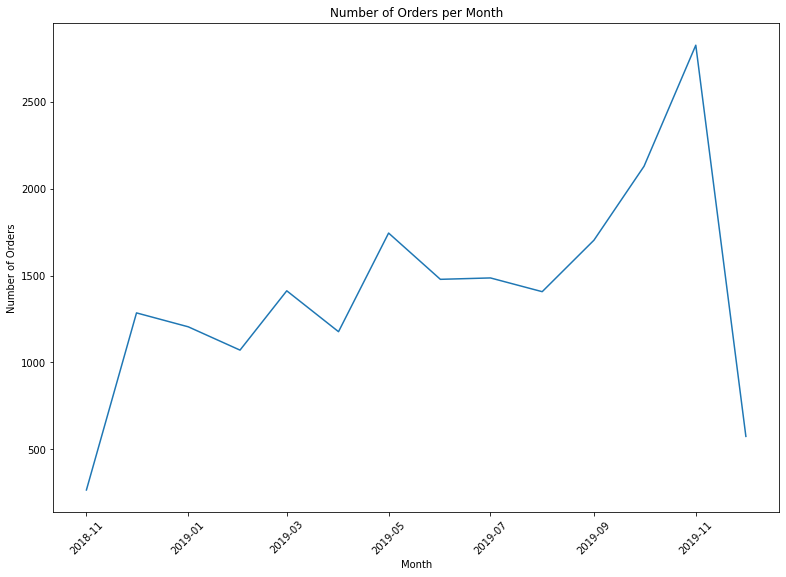

In [50]:
orders_per_month = orders.groupby('month').agg({'invoice_no': 'nunique'})

plt.figure(figsize=(13, 9))
sns.lineplot(data=orders_per_month, x='month', y='invoice_no', color=base_color)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month')
plt.xticks(rotation=45);

The graph exhibits noticeable peaks and lows. The month with the highest number of orders is November 2019, closely followed by October 2019. Additionally, May 2019 also shows a significant volume of orders. On the other hand, November 2018 and December 2019 show relatively low order volumes. It's important to note that the data collection period spans from November 29, 2018, to December 7, 2019, which does not encompass the entire months of November 2018 and December 2019.

### Total Products Sold

In [51]:
print(f"Total Products Sold: {orders['quantity'].sum()}")

Total Products Sold: 5549301


### Products per Invoice

In [52]:
average_products_per_invoice = orders.groupby('invoice_no')['stock_code'].nunique().mean()

print(f"Average number of products per invoice: {round(average_products_per_invoice)}")

Average number of products per invoice: 26


### Products per Customer

In [53]:
average_products_per_customer = orders.groupby('customer_id')['stock_code'].nunique().mean()

print(f"Average number of products per customer: {round(average_products_per_customer)}")

Average number of products per customer: 62


### Average Purchase Size

In [54]:
final_df['total_revenue'] = final_df['quantity'] * final_df['unit_price']
total_revenue = final_df['total_revenue'].sum()
num_invoices = final_df['invoice_no'].nunique()

average_purchase_size = total_revenue / num_invoices

print(f"The average purchase size is {average_purchase_size}")

The average purchase size is 421.081776104591


/tmp/ipykernel_27/3579222551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['total_revenue'] = final_df['quantity'] * final_df['unit_price']


### Creating Categories

In [55]:
unique_description = final_df['description'].drop_duplicates().reset_index()

In [56]:
unique_description['category'] = unique_description['description'].apply(lambda words: TextBlob(words).noun_phrases)

In [57]:
unique_description['words'] = unique_description['description'].apply(lambda words: ' '.join(TextBlob(words).words.lower()))

In [58]:
unique_description.sample()

,index,description,category,words
634,1103,RED KITCHEN SCALES,[red kitchen scales],red kitchen scales


In [59]:
def category(words):
    category_map = {
        
        'DIY' : ['DIY','sewing kit', 'tattoos', 'ribbon', 'acrylic', 'make your own', 'confetti', 'kit', 'envelope', 'needle set', 'key ring',
       'tape measure', 'trinket', 'sketchbook', 'ruler', 'tape', 'shell', 'pen', 'sewing box', 'stencil', 'silicon', 
       'envelope', 'building', 'card', 'scrap'],
        
       'Garden': ['Gardening and Tools', 'botanique', 'chrysanthemum', 'lily', 'daisies', 'birds', 'fern', 'seed', 'bouquet',
                  'torch', 'flowerpot', 'pumpkin', 'pebble', 'wildflower', 'jasmine', 'herbs', 'pinecone', 'eucalyptus',
                  'lilac', 'fruit+flowers', 'sage', 'nuts', 'grass', 'cactus', 'portobello', 'cinnamon', 'planters',
                  'kukui', 'laquered', 'hibiscus', 'raspberry', 'stiletto', 'feeding', 'flowr', 'poinsettia','parasol',
                  'gardeners', 'garden', 'daisy', 'mushroom', 'windmill', 'screwdriver'],

        'Fashion': ['Fashion', 'coat', 'purse', 'cotton', 'bracelet', 'luggage', 'stocking', 'gloss', 'gloves', 'jewellery', 'flannel',
           'knitted', 'jewelled', 'earrings', 'necklace', 'lipstick', 'sock', 'hairband', 'handbag', 'fashion', 'bags', 'scarf',
           'poncho', 'perfume', 'quilted', 'hat', 'boot', 'jewel', 'boudoir', 'cosmetic', 'shoes', 'shirt', 't-shirt', 'dress',
           'regatta', 'glamorous', 'hairbands', 'jeweled', 'socks', 'mittens', 'comb', 'rings', 'kashmir', 'pendant', 
           'necklace+bracelet', 'drawstring', 'hairclips', 'shoe', 'denim', 'diamond', 'sombrero', 'cosmetics', 'hairclip', 
           'necklac', 'suede', 'sunglasses', 'rucksack', 'stockings', 'trellistriple', 'braclet', 'bag', 'umbrella', 
           'hand warmer', 'hair grip', 'ring', 'vippassport', 'passport', 'bow', 'ring', 'tiaras', 'hairslide', 'hair clip', 
           'earring', 'bag', 'jumbo', 'backpack', 'wallet', 'bracelet', 'necklace', 'earrings'],
        
        'Kitchen': ['lunch', 'box', 'bowl', 'jar','jam', 'cake', 'cakestand', 'baking', 'brush', 'oven', 'plate', 'cutlery', 'bake',
                    'spoon', 'tea', 'coffee', 'mug', 'teacup', 'cup', 'biscuit', 'magnets', 'magnet', 'kitchen', 'napkins', 'recipe', 'apron',
                   'Kitchen', 'cake','lunch','glass', 'bottle', 'tin', 'mug', 'bowl', 'tins', 'strawberry', 'cutlery', 'jar', 'cup',
           'candle', 'egg', 'napkins', 'napkins', 'apples', 'plate', 'tissues', 'kitchen', 'coffee',
           'saucer', 'cookie', 'apron', 'teacup', 'picnic', 'pot', 'cakestand', 'milk', 'sugar', 'cutters', 'tray',
           'food', 'herb', 'apple', 'cakes', 'popcorn', 'teatime', 'bread', 'jars', 'frying', 'breakfast', 'teapot', 'plates',
           'bowls', 'cups', 'spoons', 'napkin', 'cocktail', 'crackers', 'doughnut', 'wine', 'glaze', 'vanilla', 'gingerbread', 
           'fridge', 'straws', 'cafe', 'placemats', 'cupcake', 'pudding', 'chateau', 'fork', 'spoon', 'dairy', 'toast', 'pizza',
           'coasters', 'basil', 'sundae', 'marshmallows', 'chopsticks', 'butter', 'stool', 'eggs', 'foil', 'cracker', 'salad',
           'microwave', 'chocolates', 'rosemary', 'parsley', 'thyme', 'tablecloth', 'pancake', 'chopping', 'milkmaid', 
           'mushrooms', 'pepper', 'salt', 'chives', 'scissor', 'pastry', 'teaspoons', 'cooking', 'pistachio', 'utensil',
           'cinammon', 'drink', 'pots', 'mugs', 'cupcakes', 'cupboard', 'knickerbockerglory', 'bake', 'cheese', 'cordon',
           'aluminium', 'carrot', 'platter', 'sandwich', 'tomato', 'berries', 'frappucino', 'panettone', 'truffle',
           'toffee', 'lime', 'fruitbowl', 'food/drink', 'spatula', 'doughnuts', 'vegetable', 'tortilla', 'squeezer',
           'seafood', 'marshmallow', 'placemat', 'tea', 'soap dish', 'coaster', 'oven', 'magnetic', 'ice cream'],
        
        'Gifts': ['christmas', 'party', 'bunting', 'chain', 'birthday', 'banner', 'snap cards', 'card game', 
                  'game', 'chest', 'snakes', 'domino & ladders', 'domino', 'bingo', 'playing cards', 'toy', 
                  'poppy', 'tidy', 'soldier', 'board', 'Holiday', 'gift', 'easter', 'bells', 'ornament', 'greeting', 'christmas', 'holiday', 'santa', 'invites',
           'mistletoe', 'present', 'celebration', 'santas', 'halloween', 'wrapping', 'presents', 'xmas', 'miseltoe', 'hohoho',
           'blackchristmas', 'wrap', 'christmas', 'Kids', 'spaceboy', 'dolly', 'girl', 'party', 'fairy', 'childrens', 'birthday', 'star', 'hearts', 'pencils',
        'chocolate', 'sweetheart', 'butterfly', 'sweet', 'babushka', 'magic', 'rabbit', 'cat', 'doll', 'toy', 'dinosaur', 'childs',
        'animals', 'kids', 'game', 'ball', 'playing', 'stars', 'playhouse', 'balloons', 'harmonica', 'friends', 'pencil', 
        'princess', 'glitter', 'gumball', 'chalk', 'school', 'calendar', 'children', 'horse', 'dominoes', 'books', 'skittles',
        'toys', 'candy', 'backpack', 'bicycle', 'fun', 'bunnies', 'girls', 'balloon', 'erasers', 'pens', 'boys', 'origami',
        'crayons', 'pirate', 'notebooks', 'clay', 'cowboys', 'rocket', 'giraffe', 'boy', 'football', 'sharpener', 'bubblegum',
        'smiley', 'games', 'memoboard', 'baseball', 'monsters', 'kid', 'guns', 'popsicles', 'scandispot', 'eraser', 'cubes',
        'spaceball', 'racing', 'puzzles', 'childhood', 'playtime', 'puppet', 'sharpeners', 'cartoon', 'toybox', 'magical',
        'notebook', 'jigsaw', 'circus', 'creatures', 'flying', 'space', 'sandcastle', 'teddy', 'helicopter', 'monster', 
        'treasure', 'cards', 'card'],
        
        'Home': ['t-light', 'rabbit', 'lantern', 'candle', 'candles', 'night', 'wicker', 'home', 'cushion', 
                 'cover', 'clock', 'alarm', 'frame', 'decoration', 'sign', 'doormat', 'art',
                 'cabinet', 'drawer', 'desc', 'chair', 'shelf', 'stool', 'rack', 'crayon', 'stationery', 
                 'colour', 'pencil', 'notebooks', 'tags', 'paint', 'chalk sticks', 'book', 'writing', 'ruler',
                'Home Decor', 'metal', 'design', 'sign', 't-light', 'hanging', 'decoration', 'wooden', 'pantry', 'home', 'ceramic',
         'doormat', 'wicker', 'drawer', 'frame', 'wall', 'wood', 'flower', 'candles', 'knob', 'alarm', 'hook', 'ribbons', 
         'cushion', 'storage', 'alphabet', 'light', 'photo', 'scandinavian', 'boxes', 'painted', 'lights', 'door', 'art',
         'mirror', 'picture', 'lantern', 'hanger', 'table', 't-lights', 'rack', 'basket', 'bathroom', 'decorative', 'towels', 
         'led', 'stickers', 'style', 'doorstop', 'stationery', 'scented', 'watering', 'mat', 'lovebird', 'plant', 'flowers',
         'honeycomb', 'fan', 'feather', 'fancy', 'welcome', 'bath', 'towel', 'candleholder', 'apothecary', 'baths', 'birdhouse',
         'office', 'designs', 'ladder', 'incense', 'modern', 'laundry', 'sheet', 'lamp', 'engraved', 'bedroom', 'cacti',
         'lovebirds', 'print', 'polyester', 'porcelain', 'candlestick', 'gazebo', 'livingroom', 'canvas', 'tealight',
         'chocolatecandle', 'hammock', 'incense/candle', 'miniature', 'drawerknob', 'coathanger', 'doorsign', 'paperweight',
         'pedestal', 'memoboard', 'jardiniere', 'bohemian', 'chandelier', 'drawers', 'blackboard', 'china', 'abstract',
         'polkadots', 'curtain', 'lampshade', 'amethyst', 'candlepot', 'baskets', 'lightbulb', 'frames', 'paisely',
         'incense/cand', 'ladybird', 'incense/candl', 'squarecushion', 'pearlised', 'globe', 'camden', 'vase', 'doorbell',
         'chair', 'photoframe', 'ashtray', 'carpet', 'shaggy', 'candlestand', 'wallhanging', 'cushions', 'miniture',
         'candle+incense', 'magnets', 'set of', 'tissue box', 'cabinet', 'stand', 'soap holder', 'tissue', 'deco', 
         'bullet bin', 'cannister', 'clock', 'ivory']
    }

    for category, words_list in category_map.items():
        if any(word in words for word in words_list):
            return category
    
    return 'Other'

In [60]:
unique_description['category'] = unique_description['words'].apply(category)

In [61]:
final_df = final_df.merge(unique_description[['description', 'category']], on='description', how='inner')

In [62]:
final_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,year,month,week,date,total_revenue,category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29,15.3,Home
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 09:02:00,2.55,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29,15.3,Home
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 09:32:00,2.55,17850,2018-01-01,2018-11-01,2018-11-29,2018-11-29,15.3,Home
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2018-11-29 10:19:00,2.55,17511,2018-01-01,2018-11-01,2018-11-29,2018-11-29,163.2,Home
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2018-11-29 10:39:00,2.55,13408,2018-01-01,2018-11-01,2018-11-29,2018-11-29,81.6,Home


In [63]:
final_df['category'].value_counts()

Kitchen    197858
Fashion     93022
Home        84581
Gifts       69368
DIY         62538
Garden      16947
Other        5705
Name: category, dtype: int64

In [64]:
final_df['category'].dtype

dtype('O')

In [65]:
final_df['category'] = final_df['category'].astype('category')

### Category-wise Average Price

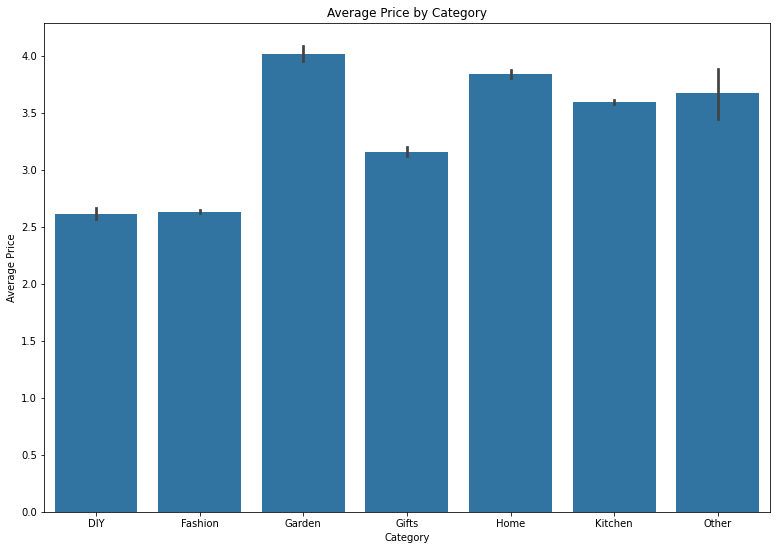

In [66]:
plt.figure(figsize=(13, 9))
sns.barplot(x='category', y='unit_price', data=final_df, color=base_color)
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price by Category');

## Analyzing the Product range

### Average Monthly Revenue

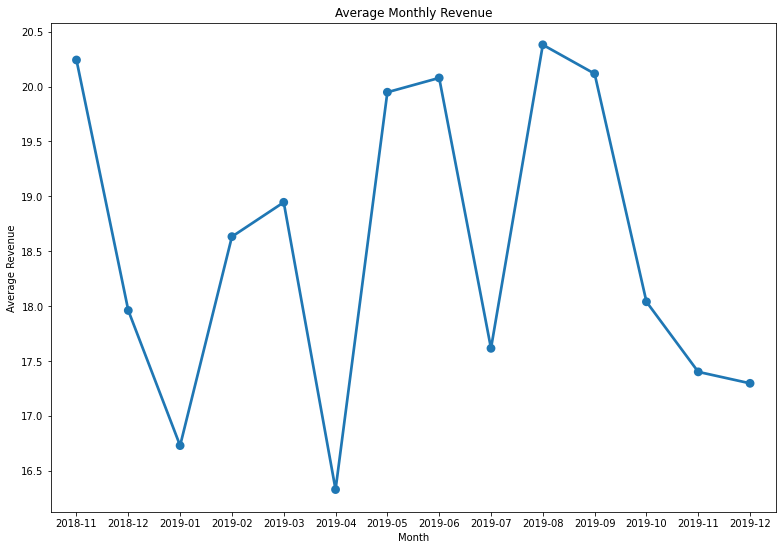

In [67]:
average_revenue_per_month = final_df.groupby('month')['total_revenue'].mean().reset_index()
plt.figure(figsize=(13, 9))
sns.pointplot(data=average_revenue_per_month, x='month', y='total_revenue', color=base_color)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Monthly Revenue')
plt.gca().set_xticklabels(average_revenue_per_month['month'].dt.strftime('%Y-%m'));

In this graph, we can identify peaks and lows in terms of revenue. It can be inferred that months with lower revenue correspond to periods when customers tend to purchase cheaper products and/or cancel a higher number of orders. The months of August 2019 and November 2018 stand out with the highest revenue. Interestingly, both April 2019 and November 2019 exhibit the lowest revenue, despite November 2019 having the highest number of orders. This finding adds an intriguing aspect to the analysis, as it suggests that order quantity alone does not necessarily translate into higher revenue.

### Most Profitable Season

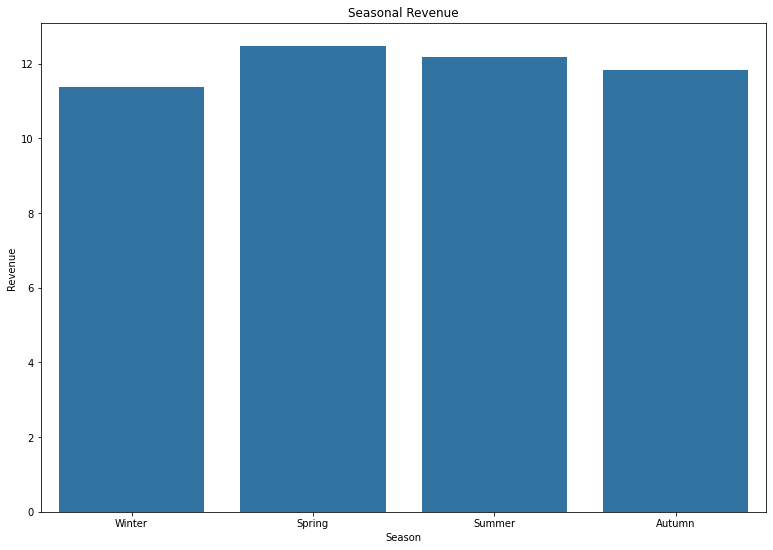

In [68]:
# Calculate the trimmed mean revenue for each season
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['season'] = final_df['date'].dt.month % 12 // 3 + 1
trimming_percentage = 0.05
seasonal_revenue = final_df.groupby('season')['total_revenue'].apply(lambda x: x.loc[(x >= x.quantile(trimming_percentage)) & (x <= x.quantile(1 - trimming_percentage))].mean())

# Create a bar plot
plt.figure(figsize=(13, 9))
sns.barplot(x=seasonal_revenue.index, y=seasonal_revenue, color=base_color)
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Seasonal Revenue')
season_names = ['Winter', 'Spring', 'Summer', 'Autumn']
plt.xticks(range(4), season_names, rotation=0);

The analysis reveals that all seasons demonstrate profitability, with spring emerging as the most lucrative season in terms of revenue. On the other hand, winter exhibits the lowest revenue among all seasons. This indicates a seasonal variation in purchasing patterns, with customers potentially being more inclined to spend during the spring season compared to winter.

### Top Categories

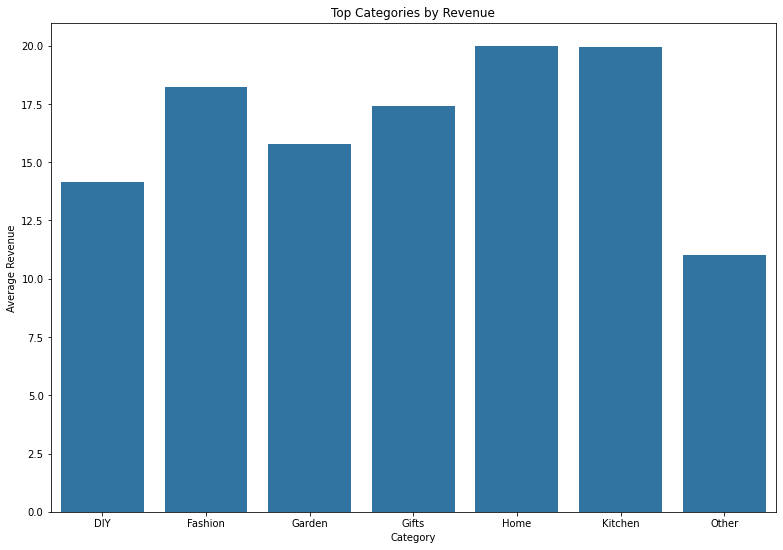

In [69]:
category_revenue = final_df.groupby('category')['total_revenue'].mean().reset_index()

# Sort the categories by revenue in descending order
category_revenue_sorted = category_revenue.sort_values(by='total_revenue', ascending=False)

# Create the bar plot
plt.figure(figsize=(13, 9))
sns.barplot(y='total_revenue', x='category', data=category_revenue_sorted, color=base_color)
plt.ylabel('Average Revenue')
plt.xlabel('Category')
plt.title('Top Categories by Revenue');

The analysis suggests that Home and Kitchen categories are equally popular, followed closely by the Fashion category. Additionally, the Gifts category also enjoys considerable popularity among customers. On the other hand, the Garden, DIY, and Other categories appear to be less favored by customers, indicating relatively lower levels of popularity.

###  Most Popular Products

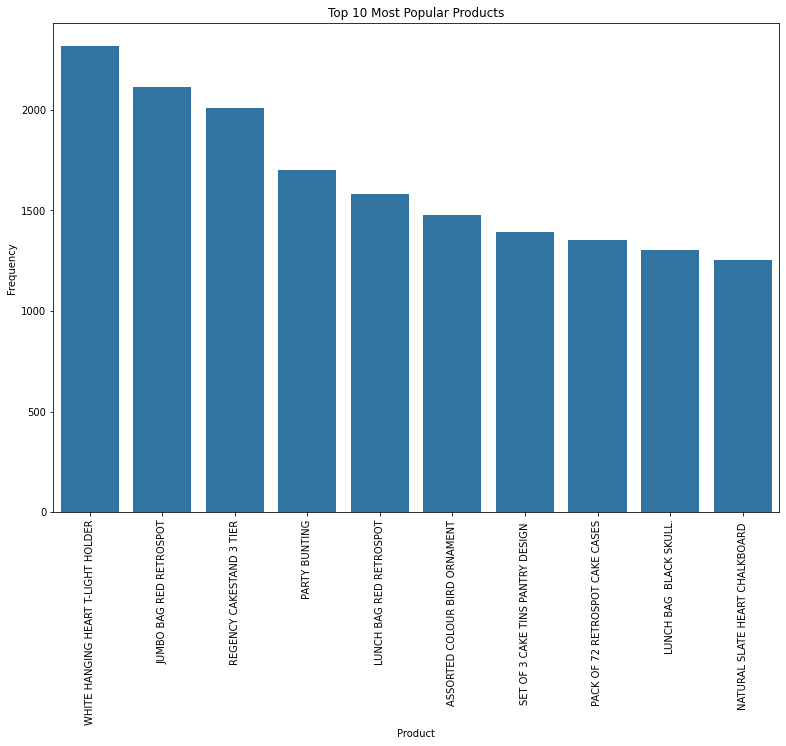

In [70]:
product_counts = orders['description'].value_counts()
top_10_popular_products = product_counts.head(10)

plt.figure(figsize=(13, 9))
sns.barplot(x=top_10_popular_products.index, y=top_10_popular_products.values, color=base_color)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 10 Most Popular Products')
plt.xticks(rotation=90);

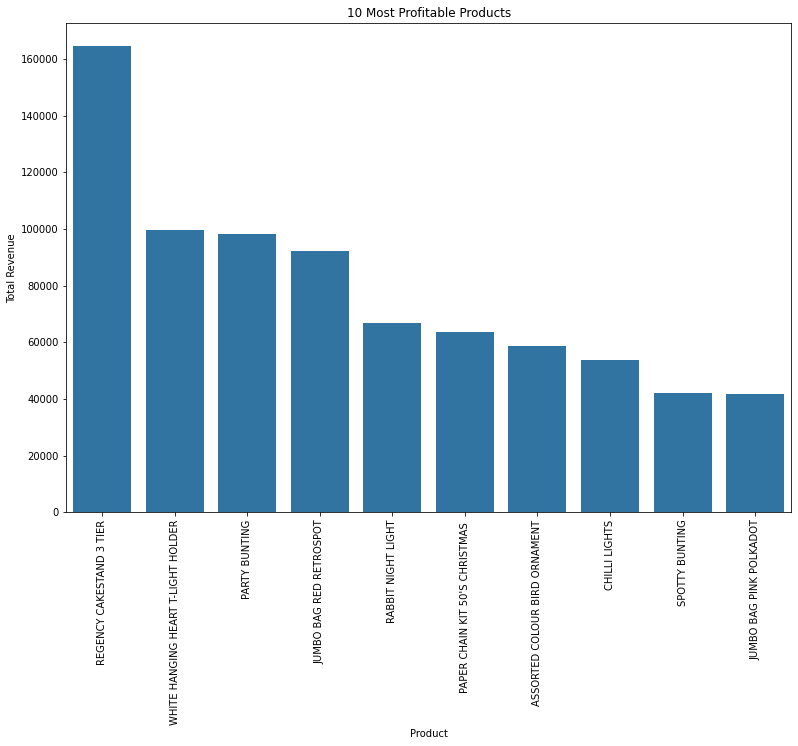

In [71]:
profitable_products = final_df.groupby('description')['total_revenue'].sum().nlargest(n=10)
plt.figure(figsize=(13, 9))
sns.barplot(x=profitable_products.index, y=profitable_products.values, color=base_color)
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('10 Most Profitable Products')
plt.xticks(rotation=90);

Based on the data, the "WHITE HANGING HEART T-LIGHT HOLDER" and the "Regency cakestand 3 tier" are identified as the most popular and profitable products. These particular items seem to resonate well with customers and generate significant revenue.

### Least Popular Products

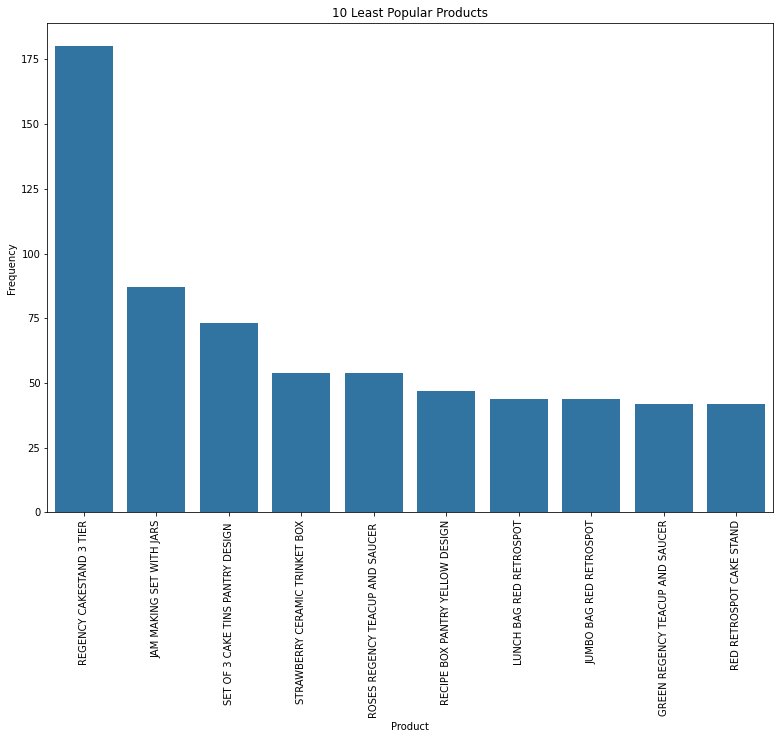

In [72]:
least_popular_products = cancelled_orders['description'].value_counts().head(10)
plt.figure(figsize=(13, 9))
sns.barplot(x=least_popular_products.index, y=least_popular_products.values, color=base_color)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('10 Least Popular Products')
plt.xticks(rotation=90);

Despite the "Regency cakestand 3 tier" being popular and profitable, it is noteworthy that it is also the most frequently returned product. While it generates revenue and attracts customers, it appears to have a higher rate of returns compared to other items.

### Return Rate

In [73]:
cancelled_orders.shape[0] / final_df.shape[0] * 100

1.630507585577121

The data indicates that only approximately 2% of the products are returned. This low return rate suggests that the majority of customers are satisfied with their purchases and do not find a need to return the items.

## Formulating and Testing statistical hypotheses

### Revenue Comparison: November vs. Rest of the Year

H0 - Revenue in November is not higher than the rest of the year.

H1 - Revenue in November is higher than the rest of the year.

Alpha - 0.05

In [77]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate total revenue
total_revenue = final_df['total_revenue'].sum()

# Calculate November's revenue and its share of total revenue
november_revenue = final_df[final_df['month'].dt.month == 11]['total_revenue'].sum()
november_share = november_revenue / total_revenue

# Calculate the average revenue share for other months
other_months_revenue = final_df[final_df['month'].dt.month != 11].groupby('month')['total_revenue'].sum()
other_months_share = other_months_revenue / total_revenue
avg_other_months_share = other_months_share.mean()

# Perform z-test for proportions
count = np.array([november_revenue, other_months_revenue.sum()])
nobs = np.array([total_revenue, total_revenue])

p_value = proportions_ztest(count, nobs)[1]

print('p-value: ', p_value)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject null hypothesis.\nRevenue in November is not higher than the rest of the year.")
else:
    print("Failed to reject null hypothesis.\nRevenue in November is higher than the rest of the year.")

p-value:  0.0
Reject null hypothesis.
Revenue in November is not higher than the rest of the year.


In [78]:
november_revenue

1561205.92

In [79]:
other_months_revenue.sum()

8197785.323000291

### Comparing Popularity: Gifts Category vs. DIY Category

H0 -  Items from the Gifts category are as popular as the items in the DIY category.

H1 -  Items from the Gifts category are not as popular as the items in the DIY category.

Alpha - 0.05

In [84]:
from scipy import stats as st
gifts_items = final_df[final_df['category'] == 'Gifts']['quantity']
diy_items = final_df[final_df['category'] == 'DIY']['quantity']

t_stat, p_value = st.ttest_ind(gifts_items, diy_items)

alpha = 0.05

print('Statistics = %.3f, p = %.3f' % (t_stat, p_value))
print()
if p_value < alpha:
    print("Reject null hypothesis.\nItems from the Gifts category are not as popular as the items in the DIY category.")
else:
    print("Failed to reject null hypothesis.\nItems from the Gifts category are as popular as the items in the DIY category.")

Statistics = 4.267, p = 0.000

Reject null hypothesis.
Items from the Gifts category are not as popular as the items in the DIY category.


In [85]:
gifts_items

4931        32
4932        16
4933        32
4934         8
4935        24
4936         8
4937        16
4938        80
4939         8
4940         8
4941         8
4942         8
4943         1
4944       320
4945         1
4946         5
4947        48
4948        96
4949         8
4950         8
4951         8
4952         8
4953        16
4954         8
4955        16
4956        16
4957        13
4958        32
4959         4
4960         8
4961         8
4962         8
4963         8
4964        16
4965        16
4966         8
4967        24
4968         8
4969        48
4970         2
4971         8
4972         8
4973         8
4974       160
4975         8
4976        64
4977         7
4978         8
4979        16
4980         8
4981         8
4982         3
4983         8
4984         8
4985         8
4986         8
4987        32
4988         8
4989        32
4990        32
4991        24
4992        16
4993        16
4994        16
4995       120
4996         8
4997      

## Conclusions and Recommendations

Our journey with the data involved several steps to preprocess and prepare it for analysis. Initially, we performed data preprocessing tasks, such as handling missing values, duplicates, and column renaming. We modified the column names to adhere to Python conventions, making them more suitable for further analysis.

Next, we addressed the column types to ensure consistency and compatibility. This step involved changing the column types as needed to ensure accurate representation of the data.

To handle missing values in the "customer_id" column, we filled them with zeros (0). This allowed us to work with the data without any issues.

Subsequently, we focused on refining the dataset by removing descriptions that did not pertain to actual products. This step involved filtering out non-product entries to streamline the analysis.

Additionally, we enriched the dataset by incorporating date types. This facilitated further analysis and exploration of temporal patterns and trends within the data.

Lastly, we assigned categories to each product, providing a clearer understanding of the different product segments and enabling category-based analysis.

### Conclusions

- Store Success and Low Return Rate: The store demonstrates overall success with a remarkably low return rate. This indicates that the majority of customers are satisfied with their purchases, reflecting the store's ability to offer products that meet customer expectations.


- Consistent Revenue Across Seasons: The revenue generated by the store remains consistent throughout the different seasons of the year. However, there are noticeable drops in revenue during January and April, suggesting potential seasonal variations or factors influencing customer purchasing behavior during these months.


- Top Categories: The kitchen and home categories emerge as the most popular among customers. These categories appear to resonate well with the target audience and contribute significantly to the store's success.


- Popular and Unpopular Products: The WHITE HANGING HEART T-LIGHT HOLDER is identified as the most popular product, highlighting its appeal to customers. On the other hand, the Regency cakestand 3 tier, while profitable, is the least popular product, possibly indicating a niche or specialized customer segment.


- Price Variation and Product Preferences: Garden and home products are observed to be among the most expensive within the product range. This price difference might explain the lower revenue in this category compared to others. It suggests that customers may be more hesitant to make higher-priced purchases in the garden category.


- Relationship between Unit Price and Quantity: On average, there is a slight negative correlation between unit price and quantity purchased. This indicates that higher unit prices are associated with slightly lower quantities purchased, potentially influencing overall revenue.


- November 2019 Peak: November 2019 stands out with the highest number of orders, suggesting increased customer activity during that month. This could be attributed to various factors such as seasonal promotions, holidays, or other marketing initiatives.

### Recommendations for handling product range

- Categorization and Adjustment: Based on the insights from the report, consider adding categories to the store that align with the identified popular product segments. Continuously monitor and adjust the categories as needed to ensure they accurately reflect customer preferences and market trends.


- Clear Distinction for Administrative Notes: Ensure that the administrative notes are clearly distinguished from product descriptions. This will help avoid any confusion and provide a better browsing experience for customers.


- Focus on Home and Kitchen Products: Given the popularity of home and kitchen categories, allocate additional resources and attention to expanding and enhancing the product range within these segments. This can involve sourcing new and innovative products, exploring collaborations with relevant brands, or introducing exclusive offerings.


- Evaluate Regency Cakestand 3 Tier: Given that the Regency cakestand 3 tier is both the leading revenue generator and the most frequently cancelled product, conduct a detailed analysis to understand the reasons behind the high cancellation rate. Identify any quality issues, customer feedback, or potential improvements that can be made to reduce cancellations and enhance customer satisfaction. Additionally, consider exploring other product options from alternative suppliers to diversify the product range and mitigate any risks associated with reliance on a single product.


- Targeted Advertising in Low Revenue Months: Increase advertising efforts during the low revenue months of January and April to boost customer engagement and drive sales. Develop targeted marketing campaigns, promotions, or incentives to attract customers during these periods.


- Promote DIY and Other Categories: As the DIY and Other categories currently have lower revenue, develop marketing strategies to promote these product segments. Highlight the unique features, benefits, and value proposition of these products to increase customer interest and drive sales.

## Presentation and Dashboard

[link to presentation](https://drive.google.com/file/d/1yYOoMoSXkFtuzB4VnQvwkt0c0SxTpsMK/view?usp=sharing)

[link to dashboard](https://public.tableau.com/views/ProductRangeAnalysis_16883890346720/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)